In [142]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [143]:
data = pd.read_csv('WikiArtClean.csv')

In [144]:
#data

In [153]:
# average rating by artist
data2 = data
data2['Artist mean rating'] = 0.01
for index, row in data2.iterrows():
    artist = row['Artist']
    mean = data[data['Artist']==artist]['Mean rating'].mean()
    data2.at[index, 'Artist mean rating'] = float(mean)
    
data2 = data2.sort_values('Artist mean rating', ascending=False)
#data2 = data2[:30]

In [154]:
data2['Artist mean rating'].mean(), data2['Artist mean rating'].min(), data2['Artist mean rating'].max() 

(0.8409846407021394, -1.5, 2.6)

In [161]:
data2[:30]

,Style,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL,Is painting,Face or body,...,Pessimism,Regret,Sadness,Shame,Shyness,Surprise,Trust,Neutral,Artist mean rating,Proportion
1245,Modern Art,Impressionism,Frederic Remington,Modern Comanche,1890,https://use2-uploads0.wikiart.org/images/frede...,https://www.wikiart.org/en/frederic-remington/...,https://www.wikiart.org/en/frederic-remington,yes,face,...,0.000,0.000,0.100,0.0,0.000,0.100,0.700,0.0,2.600,0.01
1187,Modern Art,Impressionism,Julius LeBlanc Stewart,Reading,1884,https://use2-uploads8.wikiart.org/images/juliu...,https://www.wikiart.org/en/julius-leblanc-stew...,https://www.wikiart.org/en/julius-leblanc-stewart,yes,face,...,0.000,0.000,0.000,0.0,0.000,0.100,0.200,0.0,2.500,0.01
772,Post Renaissance Art,Romanticism,William Collins,Children Playing with Puppies,1812,https://use2-uploads2.wikiart.org/images/willi...,https://www.wikiart.org/en/william-collins/chi...,https://www.wikiart.org/en/william-collins,yes,face,...,0.000,0.000,0.000,0.0,0.000,0.000,0.100,0.0,2.500,0.01
1751,Post Renaissance Art,Neoclassicism,Maxfield Parrish,Garden of Allah,1918,https://use2-uploads7.wikiart.org/images/maxfi...,https://www.wikiart.org/en/maxfield-parrish/ga...,https://www.wikiart.org/en/maxfield-parrish,yes,face,...,0.000,0.000,0.000,0.0,0.000,0.077,0.462,0.0,2.460,0.01
1734,Modern Art,Post-Impressionism,Konstantin Yuon,Near The Pskov&#39;s Cathederal,1917,https://use2-uploads0.wikiart.org/images/konst...,https://www.wikiart.org/en/konstantin-yuon/nea...,https://www.wikiart.org/en/konstantin-yuon,yes,body,...,0.000,0.000,0.000,0.0,0.000,0.000,0.273,0.0,2.450,0.01
825,Post Renaissance Art,Romanticism,Thomas Sully,Portrait of the Artist,1821,https://use2-uploads1.wikiart.org/images/thoma...,https://www.wikiart.org/en/thomas-sully/portra...,https://www.wikiart.org/en/thomas-sully,yes,face,...,0.000,0.000,0.000,0.0,0.000,0.100,0.600,0.0,2.400,0.01
1269,Modern Art,Impressionism,John Lavery,Boating on the Thames,1890,https://use2-uploads8.wikiart.org/images/john-...,https://www.wikiart.org/en/john-lavery/boating...,https://www.wikiart.org/en/john-lavery,yes,face,...,0.000,0.100,0.000,0.0,0.000,0.100,0.100,0.0,2.400,0.01
1022,Post Renaissance Art,Realism,Ivan Shishkin,A Walk in the Forest,1869,https://use2-uploads0.wikiart.org/images/ivan-...,https://www.wikiart.org/en/ivan-shishkin/a-wal...,https://www.wikiart.org/en/ivan-shishkin,yes,face,...,0.040,0.000,0.020,0.0,0.040,0.020,0.240,0.0,2.380,0.01
1029,Post Renaissance Art,Realism,Ivan Shishkin,Promenading in the Forest,1869,https://use2-uploads5.wikiart.org/images/ivan-...,https://www.wikiart.org/en/ivan-shishkin/prome...,https://www.wikiart.org/en/ivan-shishkin,yes,body,...,0.000,0.000,0.100,0.0,0.000,0.000,0.300,0.0,2.380,0.01
1181,Modern Art,Impressionism,Peder Severin Kroyer,Summer Day on Skagen&#39;s Southern Beach,1884,https://use2-uploads6.wikiart.org/images/peder...,https://www.wikiart.org/en/peder-severin-kroye...,https://www.wikiart.org/en/peder-severin-kroyer,yes,face,...,0.000,0.000,0.231,0.0,0.077,0.077,0.154,0.0,2.355,0.01


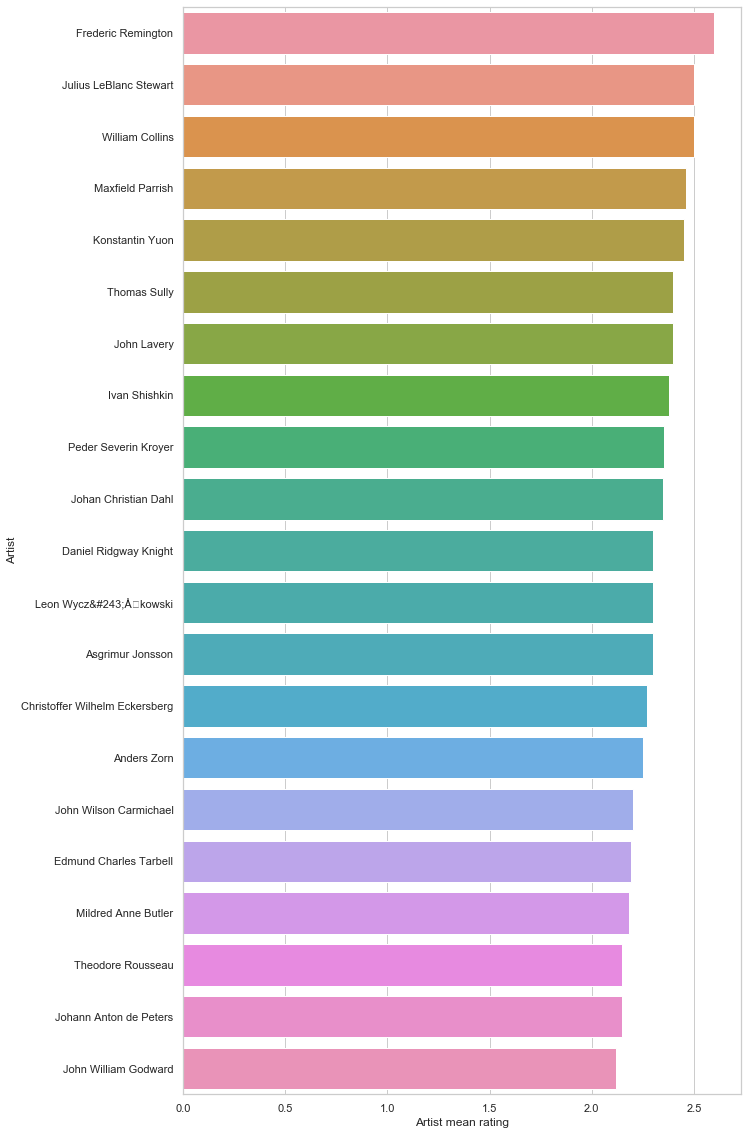

In [160]:
f, ax = plt.subplots(figsize=(10, 20))
sns.set(style="whitegrid")
ax = sns.barplot(x="Artist mean rating", y="Artist", data=data2[:30], ax=ax)
fig = ax.get_figure()
fig.savefig("figs/artist_mean_rating.png", bbox_inches='tight')

In [147]:
# face proportion by category
data3 = data
data3['Proportion'] = 0.01
for category in data['Category'].unique():
    if data[data['Category']==category].shape[0] <= 5:
        data3 = data3[data3['Category']!=category]
        
for index, row in data3.iterrows():
    category = row['Category']
    face = len(data3[(data3['Category']==category) & (data3['Face or body']=='face')])
    body = len(data3[(data3['Category']==category) & (data3['Face or body']=='body')])
    total = face + body
    ratio = round(face / total, 3)
    data3.at[index, 'Proportion'] = float(ratio)

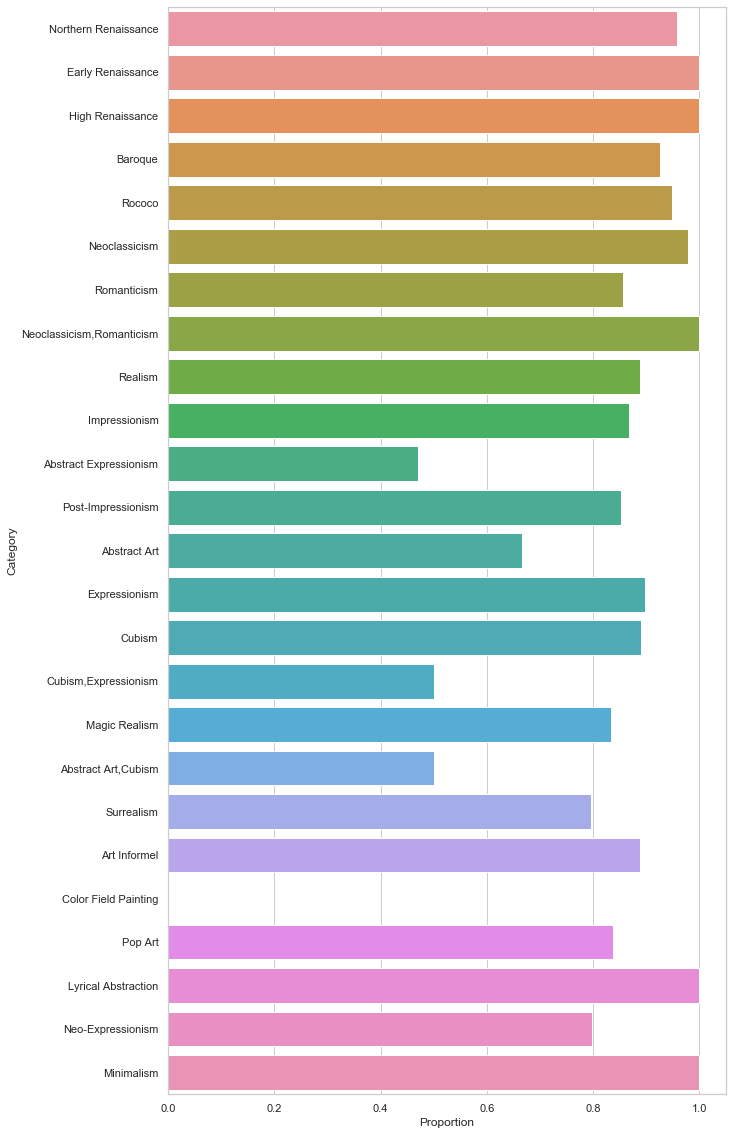

In [159]:
f, ax = plt.subplots(figsize=(10, 20))
sns.set(style="whitegrid")
ax = sns.barplot(x="Proportion", y="Category", data=data3, ax=ax)
fig = ax.get_figure()
fig.savefig("figs/face_proportion.png", bbox_inches='tight')

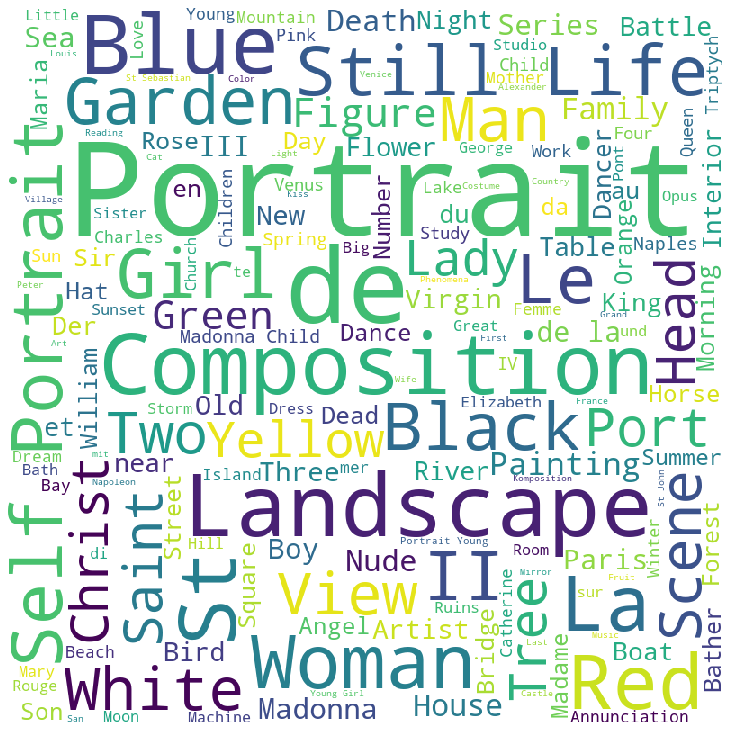

In [158]:
# wordcloud
titles = ''
for title in data['Title']:
    if 'Untitled' not in title:
        tmp = title + ' '
        titles += tmp
        
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width=800, 
                      height=800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(titles) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("figs/wordcloud.png", bbox_inches='tight')
plt.show() 